In [14]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
keras.__version__

'2.2.2'

### MNIST Example

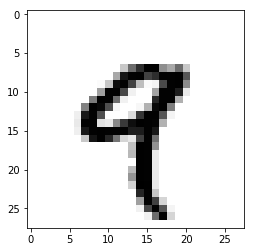

In [56]:
# Load data 
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Let's take a look at one of the training examples
digit = train_data[4] # Randomly chose index 4 
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [57]:
# Let's look at how many training examples we have
train_data.shape

(60000, 28, 28)

In [58]:
network = models.Sequential()
# Layer 1 (Hidden layer)
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
# Layer 2 (Output layer)
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Reshape data from matrix to vector and scale to between 0 and 1
train_data = train_data.reshape((60000, 28 * 28))
train_data = train_data.astype('float32') / 255

test_data = test_data.reshape((10000, 28 * 28))
test_data = test_data.astype('float32') / 255

# Make labels into vectors of 0s and 1s
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network.fit(train_data, train_labels, epochs=5, batch_size=128)
test_loss, test_acc = network.evaluate(test_data, test_labels)
print('test accuracy:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2584 - acc: 0.9255
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1045 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0679 - acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0503 - acc: 0.9852
Epoch 5/5
10000/10000 [==============================] - 0s 40us/step
test accuracy: 0.981


## IMDb Example

In [38]:
from keras.datasets import imdb

# Load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 152us/step - loss: 0.5084 - acc: 0.7811 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.3005 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8896
Epoch 3/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.2179 - acc: 0.9287 - val_loss: 0.3086 - val_acc: 0.8713
Epoch 4/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1750 - acc: 0.9438 - val_loss: 0.2841 - val_acc: 0.8830
Epoch 5/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8871
Epoch 6/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3168 - val_acc: 0.8773
Epoch 7/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - val_ac

In [40]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1, len(train_acc) +1))


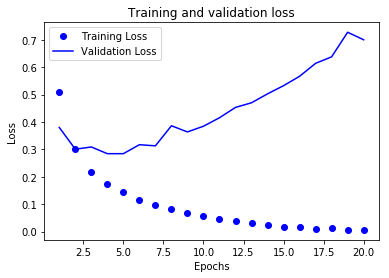

In [41]:
plt.plot(epochs, train_loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

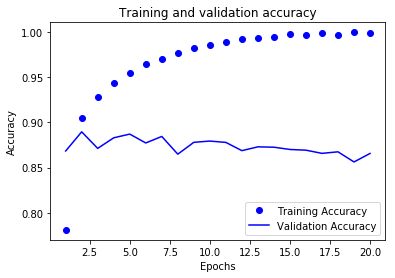

In [42]:
plt.plot(epochs, train_acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [43]:
# Create another network from scratch and test performance
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.1982 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 2s 65us/step
[0.32330194712638854, 0.87344]


### Regularization
#### Reducing the network's size

In [44]:
# Simpler, lower capaciy model
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.6021 - acc: 0.7633 - val_loss: 0.5232 - val_acc: 0.8408
Epoch 2/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.4581 - acc: 0.8721 - val_loss: 0.4294 - val_acc: 0.8581
Epoch 3/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.3669 - acc: 0.8943 - val_loss: 0.3703 - val_acc: 0.8730
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.3027 - acc: 0.9107 - val_loss: 0.3269 - val_acc: 0.8833
Epoch 5/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.2569 - acc: 0.9228 - val_loss: 0.3010 - val_acc: 0.8881
Epoch 6/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2214 - acc: 0.9315 - val_loss: 0.2843 - val_acc: 0.8921
Epoch 7/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1942 - acc: 0.9401 - val_loss: 0.2770 - val_ac

In [46]:
train_acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

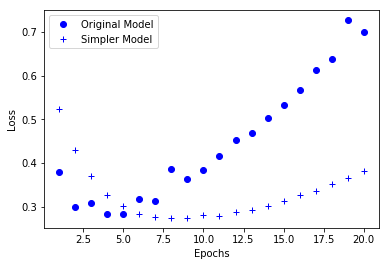

In [47]:
plt.plot(epochs, val_loss, 'bo', label = 'Original Model')
plt.plot(epochs, val_loss2, 'b+', label = 'Simpler Model')
plt.title('')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [49]:
# More complex, higher capaciy model
model3 = models.Sequential()
model3.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [50]:
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 356us/step - loss: 0.5312 - acc: 0.7630 - val_loss: 0.3179 - val_acc: 0.8750
Epoch 2/20
15000/15000 [==============================] - 5s 314us/step - loss: 0.2564 - acc: 0.8966 - val_loss: 0.2712 - val_acc: 0.8871
Epoch 3/20
15000/15000 [==============================] - 5s 320us/step - loss: 0.1407 - acc: 0.9485 - val_loss: 0.3002 - val_acc: 0.8908
Epoch 4/20
15000/15000 [==============================] - 5s 319us/step - loss: 0.0807 - acc: 0.9731 - val_loss: 0.6891 - val_acc: 0.8130
Epoch 5/20
15000/15000 [==============================] - 5s 315us/step - loss: 0.0303 - acc: 0.9893 - val_loss: 0.4645 - val_acc: 0.8834
Epoch 6/20
15000/15000 [==============================] - 5s 317us/step - loss: 0.1169 - acc: 0.9792 - val_loss: 0.3701 - val_acc: 0.8871
Epoch 7/20
15000/15000 [==============================] - 5s 325us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.5000 - 

In [51]:
train_acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
train_loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

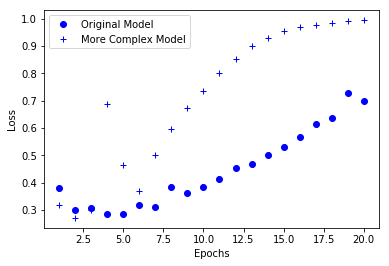

In [52]:
plt.plot(epochs, val_loss, 'bo', label = 'Original Model')
plt.plot(epochs, val_loss3, 'b+', label = 'More Complex Model')
plt.title('')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Adding weight regularization

In [59]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [60]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [61]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 164us/step - loss: 0.5015 - acc: 0.8195 - val_loss: 0.3926 - val_acc: 0.8752
Epoch 2/20
25000/25000 [==============================] - 3s 137us/step - loss: 0.3249 - acc: 0.9024 - val_loss: 0.3405 - val_acc: 0.8872
Epoch 3/20
25000/25000 [==============================] - 3s 112us/step - loss: 0.2759 - acc: 0.9202 - val_loss: 0.3297 - val_acc: 0.8883
Epoch 4/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.2581 - acc: 0.9262 - val_loss: 0.3572 - val_acc: 0.8778
Epoch 5/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.2438 - acc: 0.9323 - val_loss: 0.3427 - val_acc: 0.8815
Epoch 6/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2330 - acc: 0.9348 - val_loss: 0.3500 - val_acc: 0.8799
Epoch 7/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.2269 - acc: 0.9384 - val_loss: 0.3608 - 

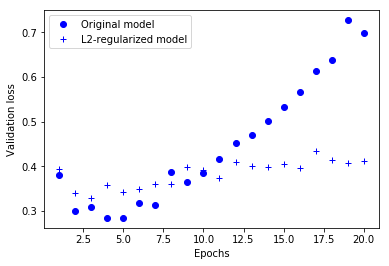

In [64]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'bo', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'b+', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

#### Adding Dropout

In [66]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [67]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 149us/step - loss: 0.6162 - acc: 0.6584 - val_loss: 0.5248 - val_acc: 0.8576
Epoch 2/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.5014 - acc: 0.7881 - val_loss: 0.4222 - val_acc: 0.8777
Epoch 3/20
25000/25000 [==============================] - 3s 130us/step - loss: 0.4249 - acc: 0.8498 - val_loss: 0.3702 - val_acc: 0.8821
Epoch 4/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.3680 - acc: 0.8782 - val_loss: 0.3193 - val_acc: 0.8825
Epoch 5/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.3208 - acc: 0.8979 - val_loss: 0.3119 - val_acc: 0.8700
Epoch 6/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2818 - acc: 0.9129 - val_loss: 0.2987 - val_acc: 0.8800
Epoch 7/20
25000/25000 [==============================] - 3s 115us/step - loss: 0.2467 - acc: 0.9215 - val_loss: 0.3075 - 

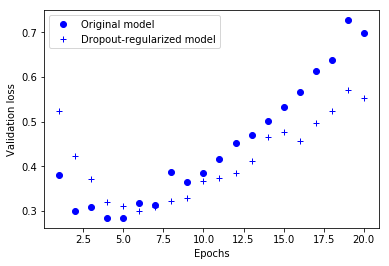

In [68]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'bo', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'b+', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()